   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 63.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topics:
Topic 1: 0.007*"would" + 0.007*"get" + 0.006*"one" + 0.004*"know" + 0.004*"time" + 0.004*"people" + 0.004*"year" + 0.004*"like" + 0.003*"use" + 0.003*"think"
Topic 2: 0.044*"0" + 0.006*"argument" + 0.005*"one" + 0.004*"fallacy" + 0.003*"conclusion" + 0.003*"true" + 0.003*"example" + 0.003*"father" + 0.003*"church" + 0.003*"may"
Topic 3: 0.004*"space" + 0.004*"shuttle" + 0.003*"mission" + 0.003*"would" + 0.003*"one" + 0.003*"earth" + 0.003*"god" + 0.002*"nasa" + 0.002*"1" + 0.002*"launch"
Topic 4: 0.013*"x" + 0.012*"0" + 0.011*"z" + 0.010*"2" + 0.010*"1" + 0.010*"p" + 0.009*"h" + 0.009*"8" + 0.009*"5" + 0.008*"l"
Topic 5: 0.253*"ax" + 0.018*"2" + 0.018*"max" + 0.015*"q" + 0.015*"3" + 0.012*"p" + 0.010*"n" + 0.009*"r" + 0.009*"1" + 0.009*"0"


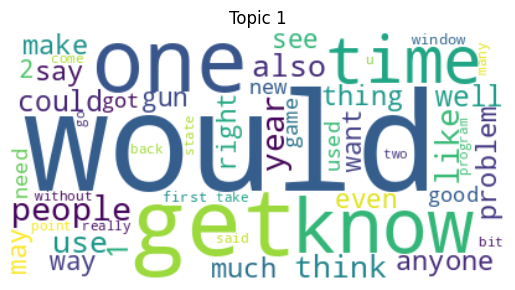

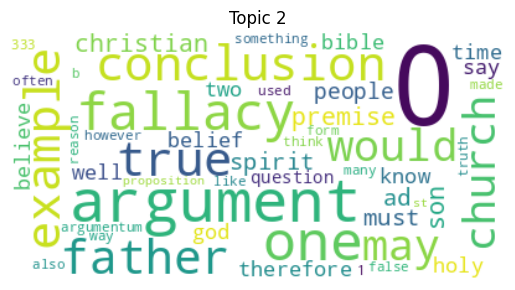

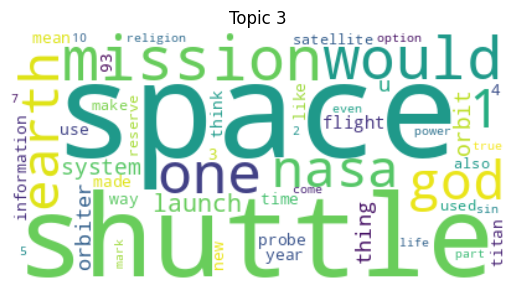

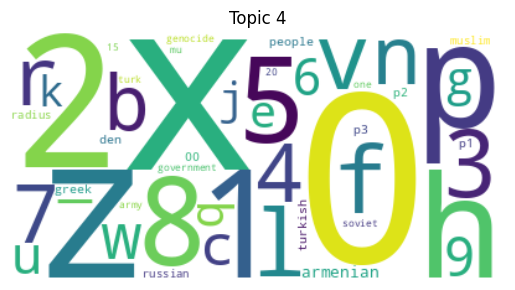

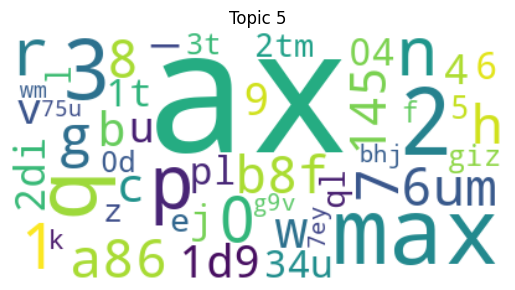

In [2]:
!pip install pyLDAvis

# Import necessary libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import re
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load Dataset
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes')).data

# Preprocessing Function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = re.sub(r'\W+', ' ', text.lower())  # Remove non-alphanumeric characters
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Filter and Preprocess Data
data = [doc for doc in data if len(doc.split()) > 20]  # Exclude overly short documents
texts = [preprocess(doc) for doc in data[:500]]  # Limit to a subset for performance

# Create Dictionary and Corpus
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA Model
num_topics = 5  # Set the number of topics
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=10,  # More passes for better convergence
    iterations=100,  # More iterations per pass
    random_state=42
)

# Display Topics
print("Topics:")
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

# Generate Word Clouds for Topics
for idx in range(num_topics):
    topic_terms = dict(lda_model.get_topic_terms(idx, topn=50))
    words = {dictionary[word_id]: weight for word_id, weight in topic_terms.items()}
    wc = WordCloud(background_color="white").fit_words(words)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {idx + 1}")
    plt.show()

# Interactive Visualization with pyLDAvis
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(panel)
